### **Link to the github repo: https://github.com/9kevin/Data-Mining-Assignment-3**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Mounting the drive
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.activity.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fexperimentsandconfigs%20https%3a%2f%2fwww.googleapis.com%2fauth%2fphotos.native&response_type=code

Enter your authorization code:
4/1AY0e-g6V5WY4akMNSX3DKTWiL1x49zYudtAGZBdErdy1RAlVqhf6oMEo7tI


Mounted at /content/drive


In [3]:
# Functions for preprocessing server logs
from datetime import datetime
import pytz

# Parse string
def parse_str(x):
    if x is None:
        return '-'
    return x[1:-1]

# Parse int
def parse_int(x):
    """Returns parsed string if no error occured during parse else returns 0"""
    if x is None:
        return 0
    try:
        y = int(x)
        return y
    except ValueError:
        return 0  

# Parse datetime
def parse_datetime(x):
    try:
        dt = datetime.strptime(x[1:-7], '%d/%b/%Y:%H:%M:%S')
        dt_tz = int(x[-6:-3])*60+int(x[-3:-1])
        return dt.replace(tzinfo=pytz.FixedOffset(dt_tz))
    except ValueError:
        return '-'

def make_full_url(url):
  if url.startswith('http://www'):
    pass
  else:
    return url.replace('http://', 'http://www.')


conv = {'time': parse_datetime,
        'request': parse_str,
        'status': parse_int,
        'size': parse_int,
        'referer': parse_str,
        'user_agent': parse_str}

In [4]:
# Importing the dataset
path = 'drive/My Drive'
df = pd.read_csv(path+'/new_log', header=None, error_bad_lines=False, sep=r'\s(?=(?:[^"]*"[^"]*")*[^"]*$)(?![^\[]*\])',
                    engine='python', na_values='-', usecols=[0, 3, 4, 5, 6, 7, 8], #names=['ip', 'time', 'request', 'status', 'size', 'referer', 'user_agent'],
                    names=['IP_address', 'Time_of_activity','Requested_Page', 'Status_Code', 'Size_of_Page', 'Referer_page','Client_Device'],
                    converters=conv)
df = df.head(100000) # Taking only 100K data

In [5]:
# Checking basic information of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   IP_address        100000 non-null  object 
 1   Time_of_activity  100000 non-null  object 
 2   Requested_Page    100000 non-null  object 
 3   Status_Code       100000 non-null  float64
 4   Size_of_Page      99215 non-null   float64
 5   Referer_page      100000 non-null  object 
 6   Client_Device     100000 non-null  object 
dtypes: float64(2), object(5)
memory usage: 5.3+ MB


In [6]:
# Checking for missing values
for col in df.columns:
  if len(df[df[col].isnull()]) > 0:
    print("Column ", col, " has ", len(df[df[col].isnull()]), " missing values")

Column  Size_of_Page  has  785  missing values


In [7]:
# Dropping all null values
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99215 entries, 0 to 99999
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   IP_address        99215 non-null  object 
 1   Time_of_activity  99215 non-null  object 
 2   Requested_Page    99215 non-null  object 
 3   Status_Code       99215 non-null  float64
 4   Size_of_Page      99215 non-null  float64
 5   Referer_page      99215 non-null  object 
 6   Client_Device     99215 non-null  object 
dtypes: float64(2), object(5)
memory usage: 6.1+ MB


In [8]:
df["unique_user"] = df['IP_address'] + df['Client_Device']
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99215 entries, 0 to 99999
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   IP_address        99215 non-null  object 
 1   Time_of_activity  99215 non-null  object 
 2   Requested_Page    99215 non-null  object 
 3   Status_Code       99215 non-null  float64
 4   Size_of_Page      99215 non-null  float64
 5   Referer_page      99215 non-null  object 
 6   Client_Device     99215 non-null  object 
 7   unique_user       99215 non-null  object 
dtypes: float64(2), object(6)
memory usage: 6.8+ MB


### **Question 1: Find 10 people who visited the site frequently**

In [9]:
# Listing the top 10 unique users who visited the site frequently
piv1 = df.pivot_table("Time_of_activity", index="unique_user", aggfunc='count')
piv1 = piv1.sort_values(ascending=False, by='Time_of_activity')
piv1[:10]

,Time_of_activity
unique_user,
"205.167.170.15""Go-http-client/1.1""",13463
"79.142.95.122""Mozilla/5.0 (Windows NT 5.1; rv:29.0) Gecko/20100101 Firefox/29.0""",3205
"148.251.50.49""-""",1929
"205.167.170.15""python-requests/1.2.3 CPython/2.7.5 Linux/3.14.27-100.fc19.x86_64""",1733
"37.1.206.196""Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/31.0.1650.57 Safari/537.36""",536
"84.112.161.41""Mozilla/5.0 (Linux; Android 5.0.2; HTC_One Build/LRX22G) AppleWebKit/537.36 (KHTML, like Gecko) Version/4.0 Chrome/33.0.0.0 Mobile Safari/537.36""",414
"52.22.118.215""Python-urllib/2.7""",367
"52.22.118.215""Python-urllib/1.17""",367
"205.167.170.15""Mozilla/5.0 (X11; Linux x86_64; rv:44.0) Gecko/20100101 Firefox/44.0""",320


### **Question 2: Showing five sessions and page views for each sessions**

In [10]:
# Sessionizing the dataset
sess_df = df.groupby(by=['IP_address', 'Client_Device', 'Time_of_activity', 'Requested_Page']).count()
sess_df.head()

Status_Code  ...  unique_user
IP_address  Client_Device                                      Time_of_activity             Requested_Page                                                   ...             
1.0.180.160 "Mozilla/5.0 (Windows NT 6.2) AppleWebKit/537.3... [11/Feb/2016:08:37:15 +0100] "GET /apache-log/access.log HTTP/1.1"                         1  ...            1
            "Opera/9.80 (Windows NT 6.2; Win64; x64) Presto... [11/Feb/2016:08:37:16 +0100] "GET /wp-login.php HTTP/1.1"                                  2  ...            2
                                                               [11/Feb/2016:08:37:25 +0100] "GET /apache-log/access.log HTTP/1.1"                         1  ...            1
                                                               [11/Feb/2016:08:37:29 +0100] "GET /index.php?option=com_easyblog&view=dashbo...            1  ...            1
1.0.180.237 "Mozilla/5.0 (Windows NT 6.1; rv:35.0) Gecko/20... [25/Jan/2016:04:55:01 +0100] "GET /apache-log/access.log HTTP/1.1"                         1  ...            1

[5 rows x 4 columns]

In [11]:
# Removing unnecessary columns
sess_df = sess_df.drop(['Status_Code', 'Size_of_Page', 'Referer_page', 'unique_user'], axis=1)
sess_df.head()

Empty DataFrame
Columns: []
Index: [(1.0.180.160, "Mozilla/5.0 (Windows NT 6.2) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/39.0.2171.99 Safari/537.36", [11/Feb/2016:08:37:15 +0100], "GET /apache-log/access.log HTTP/1.1"), (1.0.180.160, "Opera/9.80 (Windows NT 6.2; Win64; x64) Presto/2.12.388 Version/12.17", [11/Feb/2016:08:37:16 +0100], "GET /wp-login.php HTTP/1.1"), (1.0.180.160, "Opera/9.80 (Windows NT 6.2; Win64; x64) Presto/2.12.388 Version/12.17", [11/Feb/2016:08:37:25 +0100], "GET /apache-log/access.log HTTP/1.1"), (1.0.180.160, "Opera/9.80 (Windows NT 6.2; Win64; x64) Presto/2.12.388 Version/12.17", [11/Feb/2016:08:37:29 +0100], "GET /index.php?option=com_easyblog&view=dashboard&layout=write HTTP/1.1"), (1.0.180.237, "Mozilla/5.0 (Windows NT 6.1; rv:35.0) Gecko/20100101 Firefox/35.0", [25/Jan/2016:04:55:01 +0100], "GET /apache-log/access.log HTTP/1.1")]

In [12]:
# Reset the index
sess_df = sess_df.reset_index()
sess_df

,IP_address,Client_Device,Time_of_activity,Requested_Page
0,1.0.180.160,"""Mozilla/5.0 (Windows NT 6.2) AppleWebKit/537....",[11/Feb/2016:08:37:15 +0100],"""GET /apache-log/access.log HTTP/1.1"""
1,1.0.180.160,"""Opera/9.80 (Windows NT 6.2; Win64; x64) Prest...",[11/Feb/2016:08:37:16 +0100],"""GET /wp-login.php HTTP/1.1"""
2,1.0.180.160,"""Opera/9.80 (Windows NT 6.2; Win64; x64) Prest...",[11/Feb/2016:08:37:25 +0100],"""GET /apache-log/access.log HTTP/1.1"""
3,1.0.180.160,"""Opera/9.80 (Windows NT 6.2; Win64; x64) Prest...",[11/Feb/2016:08:37:29 +0100],"""GET /index.php?option=com_easyblog&view=dashb..."
4,1.0.180.237,"""Mozilla/5.0 (Windows NT 6.1; rv:35.0) Gecko/2...",[25/Jan/2016:04:55:01 +0100],"""GET /apache-log/access.log HTTP/1.1"""
...,...,...,...,...
71660,98.200.102.180,"""Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebK...",[21/Dec/2015:05:30:15 +0100],"""GET /images/stories/slideshow/almhuette_raith..."
71661,98.200.102.180,"""Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebK...",[21/Dec/2015:05:30:15 +0100],"""GET /images/stories/slideshow/almhuette_raith..."
71662,98.200.102.180,"""Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebK...",[21/Dec/2015:05:30:15 +0100],"""GET /images/stories/slideshow/almhuette_raith..."
71663,98.200.102.180,"""Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebK...",[21/Dec/2015:05:30:15 +0100],"""GET /images/stories/slideshow/almhuette_raith..."


In [13]:
# Merging the Ip address and client device information to identify a unique user
IP = set(df['IP_address'])
devices=set(df['Client_Device'])
D={}
for i,row in df.iterrows():
    if(tuple((row['IP_address'],row['Client_Device'])) in D):
        D[tuple((row['IP_address'],row['Client_Device']))]+=1
    
    else:
        D[tuple((row['IP_address'],row['Client_Device']))]=1

In [14]:
# Extracting the user, time, and page information to identify sessions
time=[]
page=[]
al=[]
for i in list(D)[:10]:
    for j,row in df.iterrows():
        if(i==tuple((row['IP_address'],row['Client_Device']))):
            time.append(row['Time_of_activity'])
            page.append(row['Requested_Page'])
            al.append(i)


In [15]:
# Saving the sessions and page views to the dataframe
session_df=pd.DataFrame({'Time':time,'Requested_Pages':page,'User':al})
session_df.head(20)

,Time,Requested_Pages,User
0,[12/Dec/2015:18:25:11 +0100],"""GET /administrator/ HTTP/1.1""","(109.169.248.247, ""Mozilla/5.0 (Windows NT 6.0..."
1,[12/Dec/2015:18:25:11 +0100],"""POST /administrator/index.php HTTP/1.1""","(109.169.248.247, ""Mozilla/5.0 (Windows NT 6.0..."
2,[13/Dec/2015:12:10:05 +0100],"""GET /administrator/ HTTP/1.1""","(109.169.248.247, ""Mozilla/5.0 (Windows NT 6.0..."
3,[13/Dec/2015:12:10:05 +0100],"""POST /administrator/index.php HTTP/1.1""","(109.169.248.247, ""Mozilla/5.0 (Windows NT 6.0..."
4,[13/Dec/2015:12:43:46 +0100],"""GET /administrator/ HTTP/1.1""","(109.169.248.247, ""Mozilla/5.0 (Windows NT 6.0..."
5,[13/Dec/2015:12:43:46 +0100],"""POST /administrator/index.php HTTP/1.1""","(109.169.248.247, ""Mozilla/5.0 (Windows NT 6.0..."
6,[12/Dec/2015:18:31:08 +0100],"""GET /administrator/ HTTP/1.1""","(46.72.177.4, ""Mozilla/5.0 (Windows NT 6.0; rv..."
7,[12/Dec/2015:18:31:08 +0100],"""POST /administrator/index.php HTTP/1.1""","(46.72.177.4, ""Mozilla/5.0 (Windows NT 6.0; rv..."
8,[14/Dec/2015:16:39:27 +0100],"""GET /administrator/ HTTP/1.1""","(46.72.177.4, ""Mozilla/5.0 (Windows NT 6.0; rv..."
9,[14/Dec/2015:16:39:28 +0100],"""POST /administrator/index.php HTTP/1.1""","(46.72.177.4, ""Mozilla/5.0 (Windows NT 6.0; rv..."


In [16]:
len(session_df['Requested_Pages'].unique())

2

## **Question 3: Show five frequent pages which the users visit before visiting this particular web site**

In [17]:

requested = df['Requested_Page']
from urllib.parse import urlparse
ref=[]
for i in requested:       
    parsed_uri = urlparse(i.replace('"', ''))
    result = '{uri.scheme}://{uri.netloc}/'.format(uri=parsed_uri)
    ref.append(result)
word_counter = {}
for url in ref:
    if url in word_counter:
        word_counter[url] += 1
    else:
        word_counter[url] = 1
popular_words = sorted(word_counter, key = word_counter.get, reverse = True)
top_5 = popular_words[:6]
for i in top_5:
    if(i==':///'''):
        top_5.remove(i)
for i,j in enumerate(top_5,start=1):
    print(i,"",j)

In [18]:
Pages_visited_per_session=list(session_df['Requested_Pages'])
Pages_accessed={}
for i,row in session_df.iterrows():
    if(row['User'] in Pages_accessed):
        Pages_accessed[row['User']].append(row['Requested_Pages'])    
    else:
        Pages_accessed[row['User']]=[row['Requested_Pages']]
for i in Pages_accessed:
    print('\n Client {} accessed these pages \n {} \n'.format(i,Pages_accessed[i]))
all_pages=[]
for i in Pages_accessed:
    all_pages.append(Pages_accessed[i])


 Client ('109.169.248.247', '"Mozilla/5.0 (Windows NT 6.0; rv:34.0) Gecko/20100101 Firefox/34.0"') accessed these pages 
 ['"GET /administrator/ HTTP/1.1"', '"POST /administrator/index.php HTTP/1.1"', '"GET /administrator/ HTTP/1.1"', '"POST /administrator/index.php HTTP/1.1"', '"GET /administrator/ HTTP/1.1"', '"POST /administrator/index.php HTTP/1.1"'] 


 Client ('46.72.177.4', '"Mozilla/5.0 (Windows NT 6.0; rv:34.0) Gecko/20100101 Firefox/34.0"') accessed these pages 
 ['"GET /administrator/ HTTP/1.1"', '"POST /administrator/index.php HTTP/1.1"', '"GET /administrator/ HTTP/1.1"', '"POST /administrator/index.php HTTP/1.1"', '"GET /administrator/ HTTP/1.1"', '"POST /administrator/index.php HTTP/1.1"', '"GET /administrator/ HTTP/1.1"', '"POST /administrator/index.php HTTP/1.1"'] 


 Client ('83.167.113.100', '"Mozilla/5.0 (Windows NT 6.0; rv:34.0) Gecko/20100101 Firefox/34.0"') accessed these pages 
 ['"GET /administrator/ HTTP/1.1"', '"POST /administrator/index.php HTTP/1.1"', '"GET

In [19]:
# Fiva pages accessed before visiting the particular page
all_pages[7] # These were accessed by client ('95.140.24.131', '"Mozilla/5.0 (Windows NT 6.0; rv:34.0) Gecko/20100101 Firefox/34.0"')

['"GET /administrator/ HTTP/1.1"',
 '"POST /administrator/index.php HTTP/1.1"',
 '"GET /administrator/ HTTP/1.1"',
 '"POST /administrator/index.php HTTP/1.1"',
 '"GET /administrator/ HTTP/1.1"',
 '"POST /administrator/index.php HTTP/1.1"',
 '"GET /administrator/ HTTP/1.1"',
 '"POST /administrator/index.php HTTP/1.1"',
 '"GET /administrator/ HTTP/1.1"',
 '"POST /administrator/index.php HTTP/1.1"',
 '"GET /administrator/ HTTP/1.1"',
 '"POST /administrator/index.php HTTP/1.1"',
 '"GET /administrator/ HTTP/1.1"',
 '"POST /administrator/index.php HTTP/1.1"']

**Question 4: Finding at least 10 sequential patterns**

In [20]:
!pip install apyori
!pip install apriori

  Created wheel for apyori: filename=apyori-1.1.2-cp37-none-any.whl size=5975 sha256=540e9e199d3c4bd0c496afbcea5114607fd477947470eff138336d051f80dfe2
  Stored in directory: /root/.cache/pip/wheels/5d/92/bb/474bbadbc8c0062b9eb168f69982a0443263f8ab1711a8cad0
Successfully built apyori
  Created wheel for apriori: filename=apriori-1.0.0-cp37-none-any.whl size=2478 sha256=05c45cad06399858fb3cf514c6b8b5e2f84ac3c3ee11710e1054ceea22c3ddc2
  Stored in directory: /root/.cache/pip/wheels/20/c3/82/6e5f443b9a41b1e9ad991017fb64814bc75b4654409a073ea3
Successfully built apriori


In [21]:
# Getting the gsp
from google.colab import files
src = list(files.upload().values())[0]

open('GSP.py','wb').write(src)

Saving gsp.py to gsp.py


4686

In [22]:
import argparse
import logging
import random
from gsp import GSP
logging.basicConfig(level=logging.DEBUG)

In [23]:
# Fitting the pages into the gsp algorithm
result = GSP(all_pages).search(0.25)

DEBUG:root:
        Run 1
        There are 2 candidates.
        The candidates have been filtered down to 2.

DEBUG:root:
        Run 2
        There are 4 candidates.
        The candidates have been filtered down to 2.

DEBUG:root:
        Run 3
        There are 8 candidates.
        The candidates have been filtered down to 2.

DEBUG:root:
        Run 4
        There are 16 candidates.
        The candidates have been filtered down to 2.

DEBUG:root:
        Run 5
        There are 32 candidates.
        The candidates have been filtered down to 2.

DEBUG:root:
        Run 6
        There are 64 candidates.
        The candidates have been filtered down to 2.

DEBUG:root:
        Run 7
        There are 128 candidates.
        The candidates have been filtered down to 2.

DEBUG:root:
        Run 8
        There are 256 candidates.
        The candidates have been filtered down to 2.

DEBUG:root:
        Run 9
        There are 512 candidates.
        The candidates have been filt

In [24]:
print(result)

[{('"POST /administrator/index.php HTTP/1.1"',): 10, ('"GET /administrator/ HTTP/1.1"',): 10}, {('"GET /administrator/ HTTP/1.1"', '"POST /administrator/index.php HTTP/1.1"'): 10, ('"POST /administrator/index.php HTTP/1.1"', '"GET /administrator/ HTTP/1.1"'): 7}, {('"GET /administrator/ HTTP/1.1"', '"POST /administrator/index.php HTTP/1.1"', '"GET /administrator/ HTTP/1.1"'): 7, ('"POST /administrator/index.php HTTP/1.1"', '"GET /administrator/ HTTP/1.1"', '"POST /administrator/index.php HTTP/1.1"'): 7}, {('"GET /administrator/ HTTP/1.1"', '"POST /administrator/index.php HTTP/1.1"', '"GET /administrator/ HTTP/1.1"', '"POST /administrator/index.php HTTP/1.1"'): 7, ('"POST /administrator/index.php HTTP/1.1"', '"GET /administrator/ HTTP/1.1"', '"POST /administrator/index.php HTTP/1.1"', '"GET /administrator/ HTTP/1.1"'): 7}, {('"GET /administrator/ HTTP/1.1"', '"POST /administrator/index.php HTTP/1.1"', '"GET /administrator/ HTTP/1.1"', '"POST /administrator/index.php HTTP/1.1"', '"GET /a

In [25]:
nav=[]
for i in result:
  nav.append(list(i.keys()))

number=[]
for i in result:
  number.append(list(i.values()))  

In [26]:
results = []
for sublist in number:
    for item in sublist:
        results.append(item)

resultnav = []
for sublist in nav:
    for item in sublist:
        resultnav.append(item)

In [27]:
# Saving the navigation and frequency data into a dataframe
data_nav = pd.DataFrame(
    {'Navigation': resultnav,
     'Frequency': results
    })

data_nav

,Navigation,Frequency
0,"(""POST /administrator/index.php HTTP/1.1"",)",10
1,"(""GET /administrator/ HTTP/1.1"",)",10
2,"(""GET /administrator/ HTTP/1.1"", ""POST /admini...",10
3,"(""POST /administrator/index.php HTTP/1.1"", ""GE...",7
4,"(""GET /administrator/ HTTP/1.1"", ""POST /admini...",7
5,"(""POST /administrator/index.php HTTP/1.1"", ""GE...",7
6,"(""GET /administrator/ HTTP/1.1"", ""POST /admini...",7
7,"(""POST /administrator/index.php HTTP/1.1"", ""GE...",7
8,"(""GET /administrator/ HTTP/1.1"", ""POST /admini...",7
9,"(""POST /administrator/index.php HTTP/1.1"", ""GE...",7


### **Question 5: Showing clusters of users with similar  navigational patterns**

In [28]:
# Printing the dataset showing page sessions
sess_df.head()

,IP_address,Client_Device,Time_of_activity,Requested_Page
0,1.0.180.160,"""Mozilla/5.0 (Windows NT 6.2) AppleWebKit/537....",[11/Feb/2016:08:37:15 +0100],"""GET /apache-log/access.log HTTP/1.1"""
1,1.0.180.160,"""Opera/9.80 (Windows NT 6.2; Win64; x64) Prest...",[11/Feb/2016:08:37:16 +0100],"""GET /wp-login.php HTTP/1.1"""
2,1.0.180.160,"""Opera/9.80 (Windows NT 6.2; Win64; x64) Prest...",[11/Feb/2016:08:37:25 +0100],"""GET /apache-log/access.log HTTP/1.1"""
3,1.0.180.160,"""Opera/9.80 (Windows NT 6.2; Win64; x64) Prest...",[11/Feb/2016:08:37:29 +0100],"""GET /index.php?option=com_easyblog&view=dashb..."
4,1.0.180.237,"""Mozilla/5.0 (Windows NT 6.1; rv:35.0) Gecko/2...",[25/Jan/2016:04:55:01 +0100],"""GET /apache-log/access.log HTTP/1.1"""


In [29]:
def convertTuple(tup): 
    str =  ''.join(tup) 
    return str

# for i in range(len(session_df['User'])):
#   session_df['User'][i] = convertTuple(session_df['User'][i])

In [30]:
# Encoding the Ip adress, device, and pages accessed
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

sess_df['IP_address'] = le.fit_transform(sess_df['IP_address'])
sess_df['Client_Device'] = le.fit_transform(sess_df['Client_Device'])
sess_df['Requested_Page'] = le.fit_transform(sess_df['Requested_Page'])

sess_df.head()

,IP_address,Client_Device,Time_of_activity,Requested_Page
0,0,330,[11/Feb/2016:08:37:15 +0100],277
1,0,524,[11/Feb/2016:08:37:16 +0100],2059
2,0,524,[11/Feb/2016:08:37:25 +0100],277
3,0,524,[11/Feb/2016:08:37:29 +0100],1722
4,1,324,[25/Jan/2016:04:55:01 +0100],277


In [31]:
# Removing the time of the activity
sess_df = sess_df.drop(['Time_of_activity'], axis=1)
sess_df.head()

,IP_address,Client_Device,Requested_Page
0,0,330,277
1,0,524,2059
2,0,524,277
3,0,524,1722
4,1,324,277


Text(0, 0.5, 'Encoded web pages')

DEBUG:matplotlib.font_manager:findfont: Matching sans\-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=12.0.
DEBUG:matplotlib.font_manager:findfont: score(<Font 'cmsy10' (cmsy10.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'STIXSizeTwoSym' (STIXSizTwoSymReg.ttf) normal normal regular normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'DejaVu Sans' (DejaVuSans-Oblique.ttf) oblique normal 400 normal>) = 1.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'DejaVu Sans' (DejaVuSans-Bold.ttf) normal normal 700 normal>) = 0.33499999999999996
DEBUG:matplotlib.font_manager:findfont: score(<Font 'cmex10' (cmex10.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'STIXGeneral' (STIXGeneralBol.ttf) normal normal 700 normal>) = 10.335
DEBUG:matplotlib.font_manager:findfont: score(<Font 'DejaVu Serif' (DejaVuSerif.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib

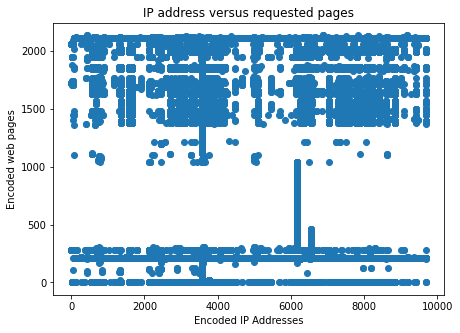

In [32]:
# Plotting the Ip address against requested_page
plt.figure(figsize=(7, 5))
plt.title("IP address versus requested pages")
plt.scatter(sess_df['IP_address'], sess_df['Requested_Page'])
plt.xlabel("Encoded IP Addresses")
plt.ylabel("Encoded web pages")

In [33]:
# Since we are solving an unsupervised learning problem, we need to cluster users with KMeans Clustering

from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4, random_state=0)
label = kmeans.fit_predict(sess_df)

# Adding another column containing the label
sess_df['label']=label

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'Encoded web pages')

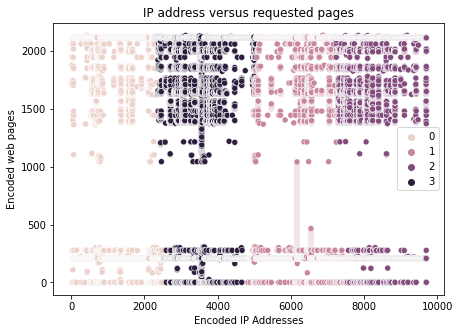

In [34]:
# Plotting the Ip address against requested_page with the clustered label
plt.figure(figsize=(7, 5))
plt.title("IP address versus requested pages")
sns.scatterplot(sess_df['IP_address'], sess_df['Requested_Page'], hue=label)
plt.xlabel("Encoded IP Addresses")
plt.ylabel("Encoded web pages")

DEBUG:matplotlib.colorbar:locator: <matplotlib.colorbar._ColorbarAutoLocator object at 0x7fc30dee2c50>
DEBUG:matplotlib.colorbar:Using auto colorbar locator on colorbar
DEBUG:matplotlib.colorbar:locator: <matplotlib.colorbar._ColorbarAutoLocator object at 0x7fc30dee2c50>
DEBUG:matplotlib.colorbar:Setting pcolormesh


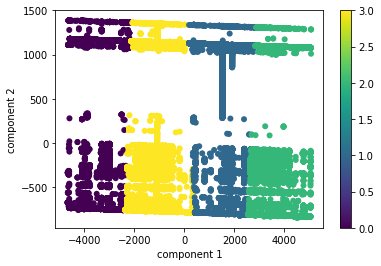

In [35]:
# Since we have a linear relationship between users and requested pages, let's use PCA for dimensionality reduction
# Instead of manifold learning which is best for non-linear relationships
from sklearn.decomposition import PCA

model = PCA(2)
projected = model.fit_transform(sess_df)
plt.scatter(projected[:, 0], projected[:, 1], c=label, edgecolor='none')
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar();